# Палеоклиматологические исследования ледяных кернов

## Загрузка данных

Большая часть данных, которые будут использоваться в этом упражнении, можно загрузить из **архива данных палеоклиматологии NOAA**.
Чтобы перейти в архив NOAA, используйте ссылку:
https://www.ncei.noaa.gov/access/paleo-search/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Часть первая: Содержание CO$_2$

- Найдите данные по керну `EPICA Dome C содержание CO2 за 800 тыс. лет`.
    - Перейдите по ссылке выше.
    - В строке `GENERAL SEARCH` введите ключевые слова поиска. Дополнительно можно выбрать в локациях Антарктику. 
    - Нажмите кнопку `SEARCH` и найдите нужное исследование в списке `SEARCH RESULTS`.
- Постройте график CO$_2$ в зависимости от возраста

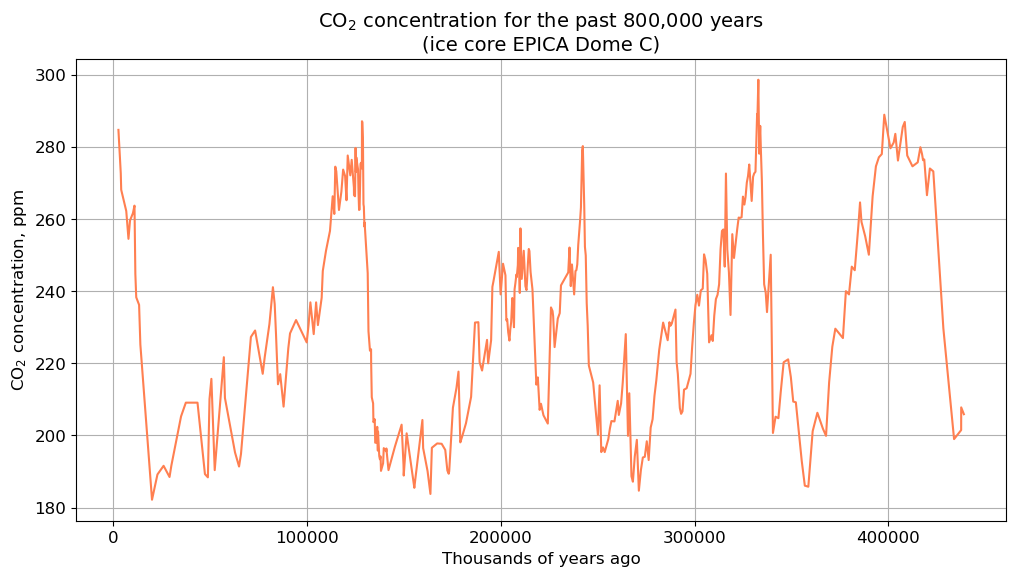

In [28]:
#Plotting the concentration of carbon dioxide in the Antarctic glacier
Depth, gas_ageBP, CO2 = np.loadtxt('vostok-edc3-co2-2008-noaa.txt', unpack=True)

plt.figure(figsize=(12,6)) 
plt.title('CO$_2$ concentration for the past 800,000 years \n(ice core EPICA Dome C)', fontsize=14) 
plt.plot(gas_ageBP, CO2, color='coral')
plt.xlabel('Thousands of years ago', fontsize=12)
plt.ylabel('CO$_2$ concentration, ppm', fontsize=12)
plt.gca().tick_params(labelsize=12) 
plt.grid()

## Часть вторая: Температурные реконструкции по Гренландии и события Dansgaard Oeschger (DO)

Скачайте данные по изотопному составу Гренландского керна **GRIP ($\delta^{18}$О) за 248 тысяч лет** (файл `gripd18o.txt`). Их можно найти на том же сайте, выбрав `ice cores` и найдя нужную строчку. Заметьте, что в файле есть пробелы в данных
- Постройте график возраст/$\delta^{18}$О за период 10000 лет – 50000 лет

- Рассчитайте температуру по данным об изотопном составе T = $\frac{13.7 + \delta^{18}О}{0.67}$.


Во время события [Dansgaard Oeschger (DO)](https://ru.wikipedia.org/wiki/%D0%9E%D1%81%D1%86%D0%B8%D0%BB%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_%D0%94%D0%B0%D0%BD%D1%81%D0%B3%D0%BE%D1%80%D0%B0_%E2%80%94_%D0%AD%D1%88%D0%B3%D0%B5%D1%80%D0%B0) температура в Арктике сначала быстро повышается, а затем медленно понижается. Найдите пример любого DO события

- На сколько градусов повысилась температура и за какой срок?
- Сколько времени потребовалось чтобы снова похолодало до уровня ледникового периода?

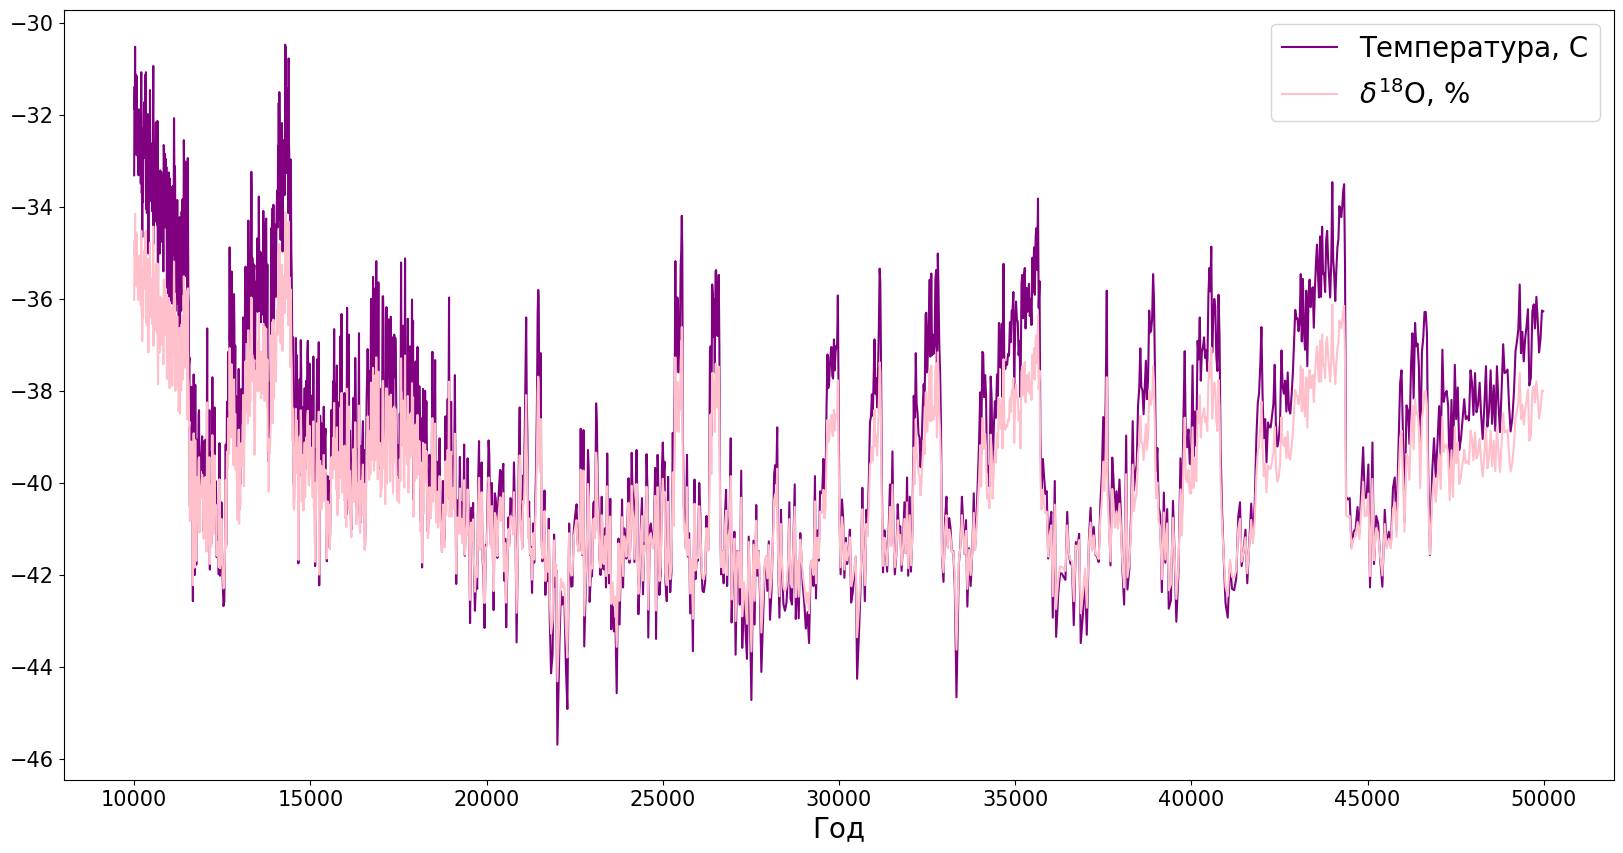

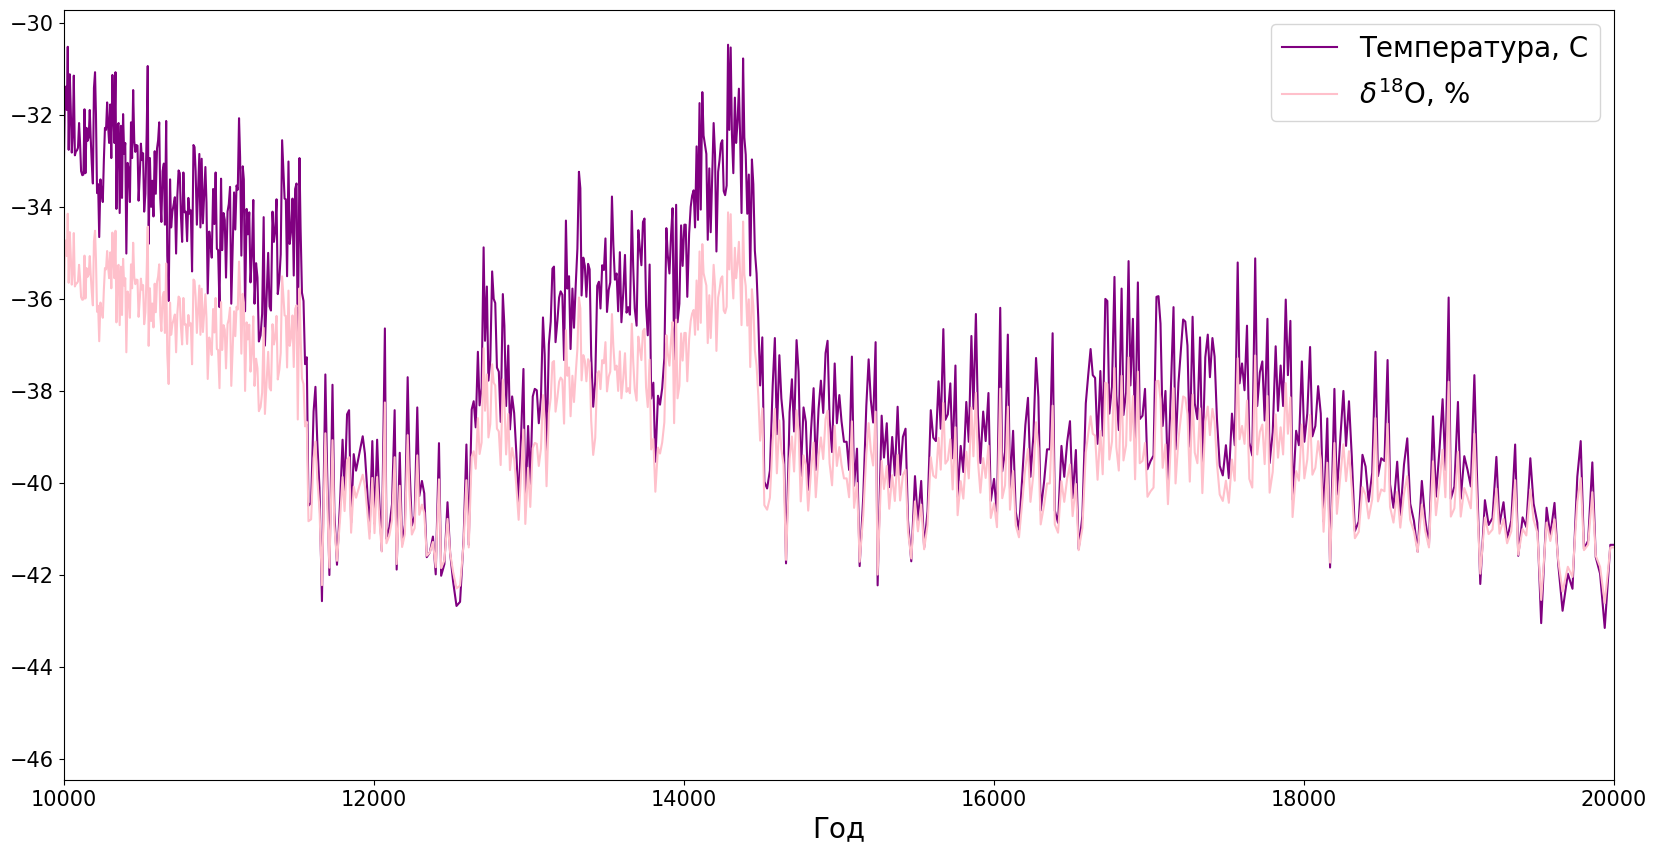

In [27]:
# At first, the data file was processed and turned into a grip1 file to make it easier to work with.
depth, grip180, age = np.loadtxt('grip1.txt', unpack=True)

#In this part of the code, a limit is set from 10 to 50 thousand years, and the temperature value is calculated. 
temp = []
for i in range(len(grip180)):
    a = float(grip180[i])
    temp.append((13.7+a)/0.67)
start, stop = 0, 0
while age[start] < 10000:
    start += 1
while age[stop] < 50000:
    stop += 1

#Here is the first graph showing the dependence of temperature and the index  on time..
fig = plt.figure(figsize=(20, 10))
ax1=fig.add_subplot(1, 1, 1, label='1')
gr1=ax1.plot(age[start:stop], temp[start:stop], color='purple')
gr2=ax1.plot(age[start:stop], grip180[start:stop], color='pink')

plt.xlabel('Год', fontsize=20)
plt.gca().tick_params(labelsize=15)
plt.legend(['Температура, С', '$\delta^{18}$О, %'], fontsize=20)

#Here is a second graph, which shows the dependence of temperature and the index 𝛿18О on time over a period of 10 to 20 thousand years.
#This graph is made to take a closer look at the Dansgaard-Eschger event.
fig2=plt.figure(figsize=(20, 10))
ax2=fig2.add_subplot(1, 1, 1, label='1')
gr3=ax2.plot(age[start:stop], temp[start:stop], color='purple')
gr4=ax2.plot(age[start:stop], grip180[start:stop], color='pink')
plt.xlim([10000, 20000])
plt.xlabel('Год', fontsize=20)
plt.gca().tick_params(labelsize=15)
plt.legend(['Температура, С', '$\delta^{18}$О, %'], fontsize=20)
plt.show()

#The second graph shows that the Dansgaard-Eschger event was observed in the interval of about 14,000 years. The temperature rose to almost -30 C from -42 C.
#It took about 1000 years for the temperature to drop to the previous level.

## Часть третья: История оледенений. Температура и CO2.

Скачайте данные по изотопному составу и температуре керна EPICA за 800 тысяч лет (`edc3deuttemp2007.txt`).
- Какие единицы измерения различных параметров?
- Определите связь температуры и изотопного состава.
- Какое разрешение данных?


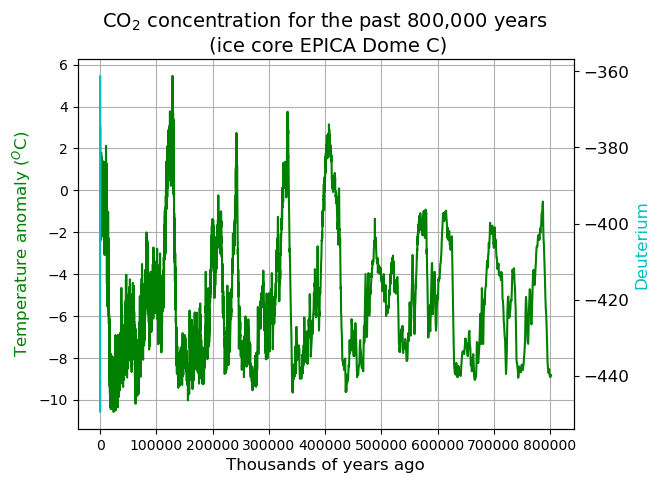

In [26]:
#Determine the relationship between temperature and isotopic composition.
Bag, ztop, Age, Deuterium, Temperature = np.loadtxt('edc3deuttemp2007.txt', unpack=True)
fig,ax = plt.subplots()
ax.set_title('CO$_2$ concentration for the past 800,000 years \n (ice core EPICA Dome C)', fontsize=14)

ax.plot(Age, Temperature , color='g')
ax.set_xlabel('Thousands of years ago', fontsize=12)    
ax.set_ylabel('Temperature anomaly ($^O$C)', color='g', fontsize=12)    

ax2 = ax.twinx ()
ax2.plot(Temperature, Deuterium, color='c')
ax2.set_ylabel('Deuterium', color='c', fontsize=12)

plt.gca().tick_params(labelsize=12) 
ax.grid()

Постройте графики изменчивости температуры за весь период.
- Сколько крупных переходов от ледниковья к межледниковью вы выделяете?
- Определите перепад температуры межледниковий и ледниковий.

На одном графике отобразите изменчивость температуры и CO$_2$ из первой части. Сравните их

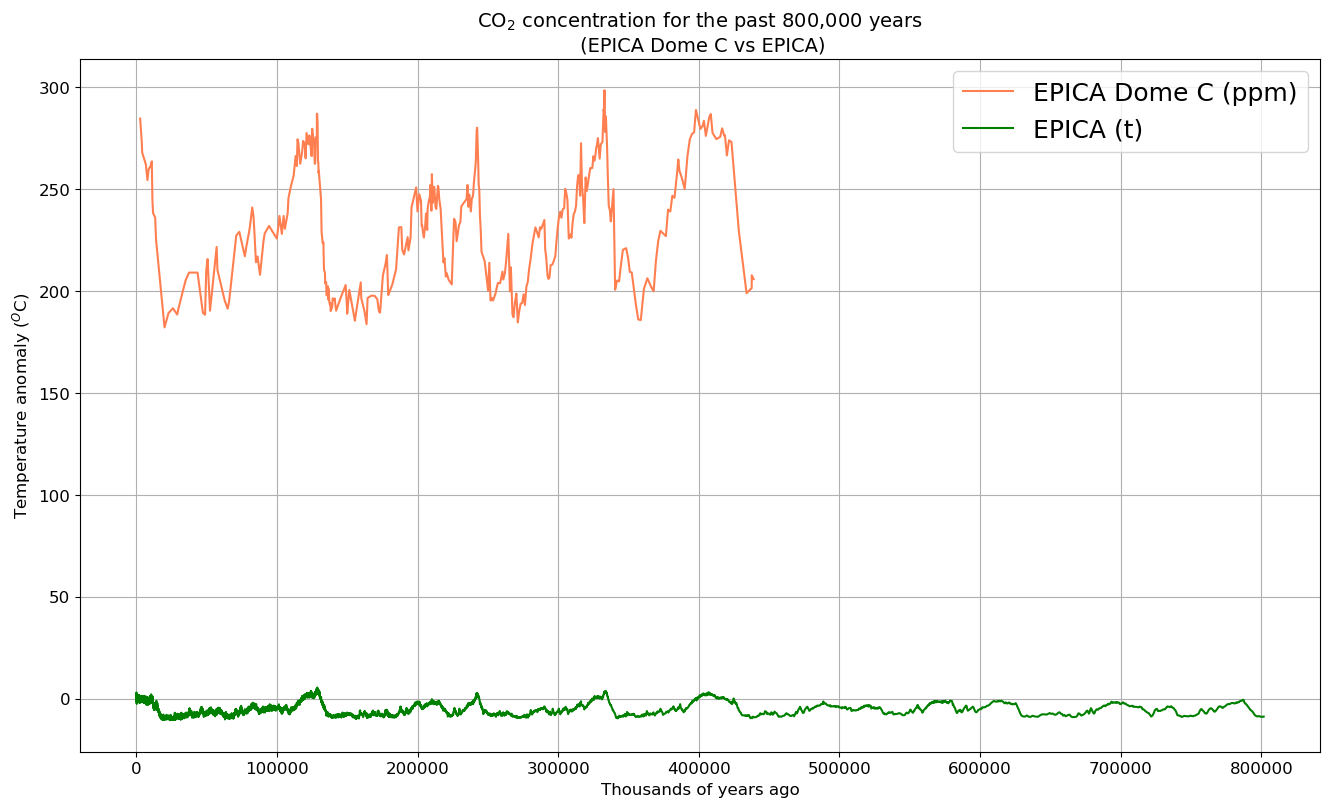

In [18]:
Depth, gas_ageBP, CO2 = np.loadtxt('vostok-edc3-co2-2008-noaa.txt', unpack=True)
Bag, ztop, Age, Deuterium, Temperature = np.loadtxt('edc3deuttemp2007.txt', unpack=True)
plt.figure(figsize=(16,9)) 
plt.title('CO$_2$ concentration for the past 800,000 years \n (EPICA Dome C vs EPICA)', fontsize=14)

plt.plot(gas_ageBP, CO2, color='coral')
plt.plot(Age, Temperature , color='g')


plt.xlabel('Thousands of years ago', fontsize=12)    
plt.ylabel('Temperature anomaly ($^O$C)', fontsize=12)    



plt.legend(['EPICA Dome C (ppm)', 'EPICA (t)'], fontsize=18)
plt.gca().tick_params(labelsize=12) 
plt.grid()

In [ ]:
# What are the units of measurement of the various parameters?
# Temperature is measured in Celsius, Age in thousands of years, CO2 concentration in ppm, hydrogen isotope content in ‰

# Determine the relationship between temperature and isotopic composition.
# As deuterium decreases, the temperature decreases

# What is the data resolution?
# DESCRIPTION:  
# High-resolution (55cm.) deuterium (dDice) profile from the EPICA Dome C Ice Core, 
# Antarctica (75º 06' S, 123º 21' E), with an optimal accuracy of ± 0.5 ‰ (1 sigma), 
# from the surface down to 3259.7 m.

# How many major transitions from glacial to interglacial do you identify?
# Five

# Determine the temperature difference between glaciers and glaciers.
# from 12 to 14 degrees

## Часть четвертая: Горные керны

В файле `Elbrus_raw_data.txt` представлены данные содержания основных ионов в ледяном керне полученном летом 2009 г. 

Постройте графики глубины и концентрации аммония (NH$_4$$^+$).
- Определите в каком году сформировался горизонт на глубине 35.8-35.9 м.
- Чем отличаются глубины? (mwe – meters water equivalent).
- До какой глубины сезонный сигнал легко читается?

In [19]:
import numpy as np
import matplotlib.pyplot as plt

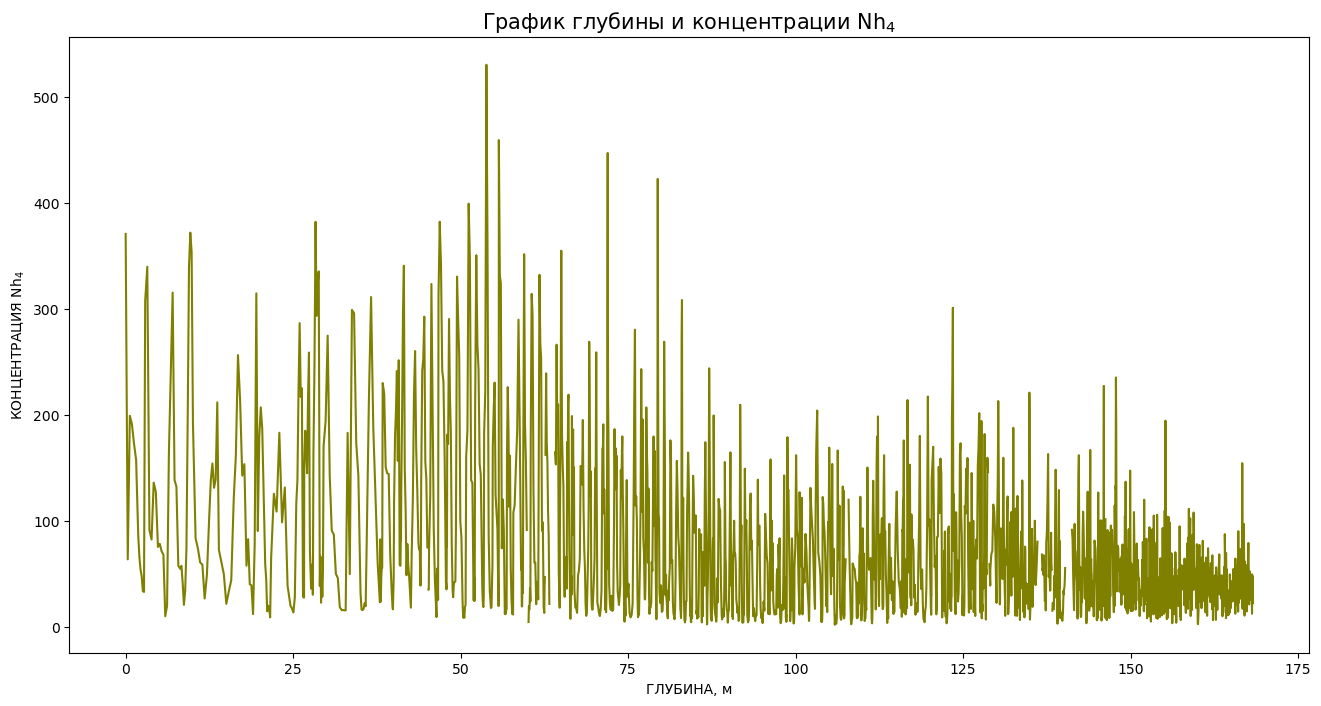

In [25]:
dep_m, dep_bot_m, dep_top_mwe, dep_bot_mwe, nh4, ca, no3, so4 = np.loadtxt('Elbrus_raw_data.txt', unpack=True, encoding='utf8')

plt.figure(figsize=(16,8))
plt.plot(dep_m, nh4, color='olive') #ammonium concentration at different depths in meters
plt.title('График глубины и концентрации Nh$_4$', fontsize=15)
plt.xlabel('ГЛУБИНА, м', fontsize=10)
plt.ylabel('КОНЦЕНТРАЦИЯ Nh$_4$', fontsize=10)
plt.show()

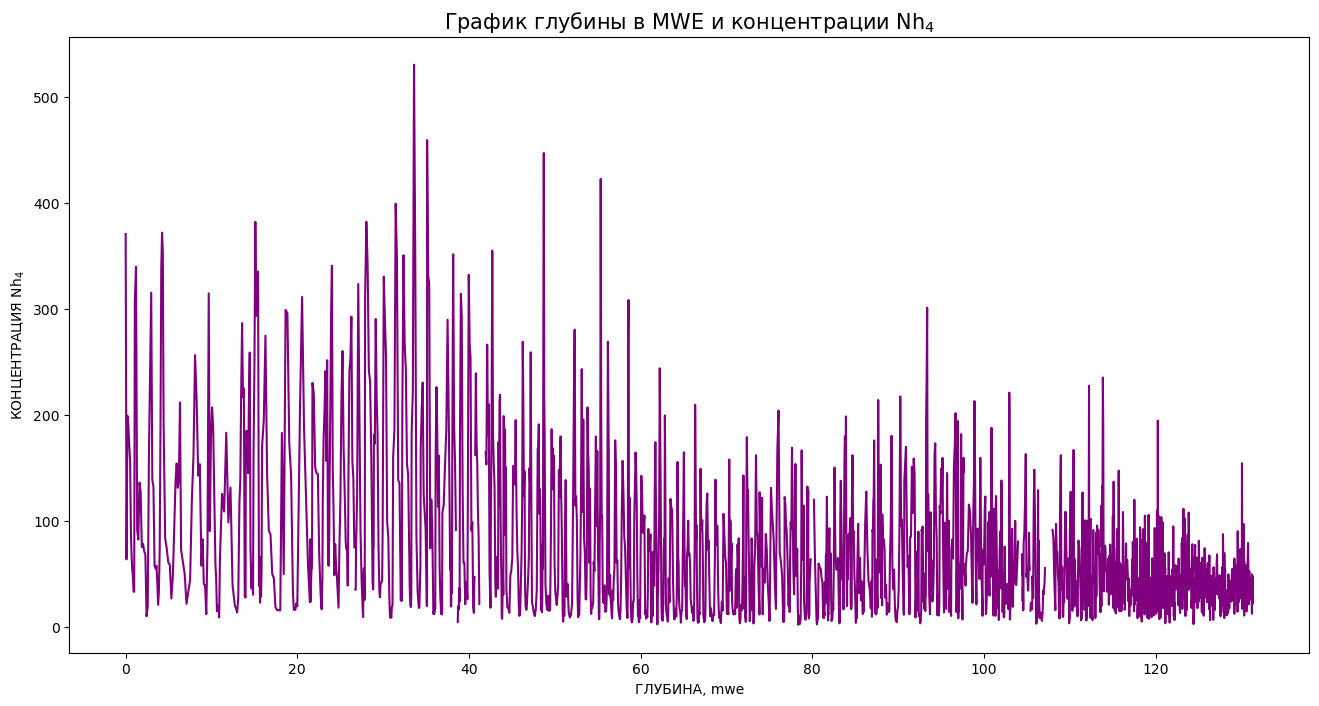

In [24]:
dep_m, dep_bot_m, dep_top_mwe, dep_bot_mwe, nh4, ca, no3, so4 = np.loadtxt('Elbrus_raw_data.txt', unpack=True, encoding='utf8')

plt.figure(figsize=(16,8))
plt.plot(dep_top_mwe, nh4, color='purple') #ammonium concentration at different depths in MWE
plt.title('График глубины в MWE и концентрации Nh$_4$', fontsize=15)
plt.xlabel('ГЛУБИНА, mwe', fontsize=10)
plt.ylabel('КОНЦЕНТРАЦИЯ Nh$_4$', fontsize=10)
plt.show()

In [ ]:
#What is the difference between the depths? (mwe – meters water equivalent).
#Meters Water Equivalent is a unit of measurement that is used to estimate the depth of geological formations. 
#It represents the equivalent depth of water, which exerts the same pressure on the formation as the actual depth of occurrence.

#To what depth is the seasonal signal easy to read?
#Approximately to about 107 meters

In [29]:
#Determine in which year the horizon was formed at a depth of 35.8-35.9 m.
dep_m, dep_bot_m, dep_top_mwe, dep_bot_mwe, nh4, ca, no3, so4 = np.loadtxt('Elbrus_raw_data.txt', unpack=True, encoding='utf8')

years_since_drilling = np.arange(dep_top_mwe.size)  #Possible annual accumulation
current_year = 2009

#Depth of interest
target_dep_mwe_1 = 35.8
target_dep_mwe_2 = 35.9

total_accumulation = dep_bot_mwe[-1]  #The total depth of the last measurement
total_years = years_since_drilling[-1]  #Total years

#Accumulation rate in meters of water equivalent per year
accumulation_rate_mwe_per_year = total_accumulation / total_years

#The number of years ago for the specified depths
years_ago_for_target_dep_1 = target_dep_mwe_1 / accumulation_rate_mwe_per_year
years_ago_for_target_dep_2 = target_dep_mwe_2 / accumulation_rate_mwe_per_year

#Calculating the target year
target_year_1 = int(current_year - years_ago_for_target_dep_1)
target_year_2 = int(current_year - years_ago_for_target_dep_2)

print(f"The layers at depths of {target_dep_mwe_1} and {target_dep_mwe_2} meters of water equivalent were formed around {target_year_2} - {target_year_1}")


The layers at depths of 35.8 and 35.9 meters of water equivalent were formed around 1235 - 1237


In [ ]:
#Determine in which year the horizon was formed at a depth of 35.8-35.9 m.
#The layers at depths of 35.8 and 35.9 meters of water equivalent were formed around 1235-1237

Откройте файл среднего за летний сезон содержания основных ионов (аммоний, нитраты, сульфаты) `Elbrus_annual_summer.txt`
- Для каждого соединения определите во сколько раз концентрация увеличилась в последние 20 лет по сравнению с доиндустриальным временем.
- В какой период времени начался активный рост концентрации?
- Предположите возможные причины

In [22]:
year, nh4, no3, so4 = np.loadtxt('Elbrus_annual_summer.txt', unpack=True, encoding='utf8')
last_year = year.max()
twenty_years_ago = last_year - 20

#Average ammonium values for the pre-industrial period and over the last 20 years
preindustrial_means = np.mean(nh4[year < 1900])
last_twenty_years_means = np.mean(nh4[year > twenty_years_ago])

#The proportion of ammonium concentration over the last 20 years relative to the pre-industrial period
increase_ratios = last_twenty_years_means / preindustrial_means

print(f"Увеличение концентрации аммония за последние 20 лет по сравнению с доиндустриальным периодом в:\n{increase_ratios} раз")

Увеличение концентрации аммония за последние 20 лет по сравнению с доиндустриальным периодом в:
3.0885592844370966 раз


In [20]:
#Average nitrates values for the pre-industrial period and over the last 20 years
preindustrial_means = np.mean(no3[year < 1900])
last_twenty_years_means = np.mean(no3[year > twenty_years_ago])

#The proportion of nitrates concentration over the last 20 years relative to the pre-industrial period
increase_ratios = last_twenty_years_means / preindustrial_means

print(f"Увеличение концентрации нитратов за последние 20 лет по сравнению с доиндустриальным периодом в:\n{increase_ratios} раз")

Увеличение концентрации нитратов за последние 20 лет по сравнению с доиндустриальным периодом в:
3.3135141282100067 раз


In [19]:
#Average sulfates values for the pre-industrial period and over the last 20 years
preindustrial_means = np.mean(so4[year < 1900])
last_twenty_years_means = np.mean(so4[year > twenty_years_ago])

#The proportion of sulfates concentration over the last 20 years relative to the pre-industrial period
increase_ratios = last_twenty_years_means / preindustrial_means

print(f"Увеличение концентрации сульфатов за последние 20 лет по сравнению с доиндустриальным периодом в:\n{increase_ratios} раз")

Увеличение концентрации сульфатов за последние 20 лет по сравнению с доиндустриальным периодом в:
5.428107759138297 раз


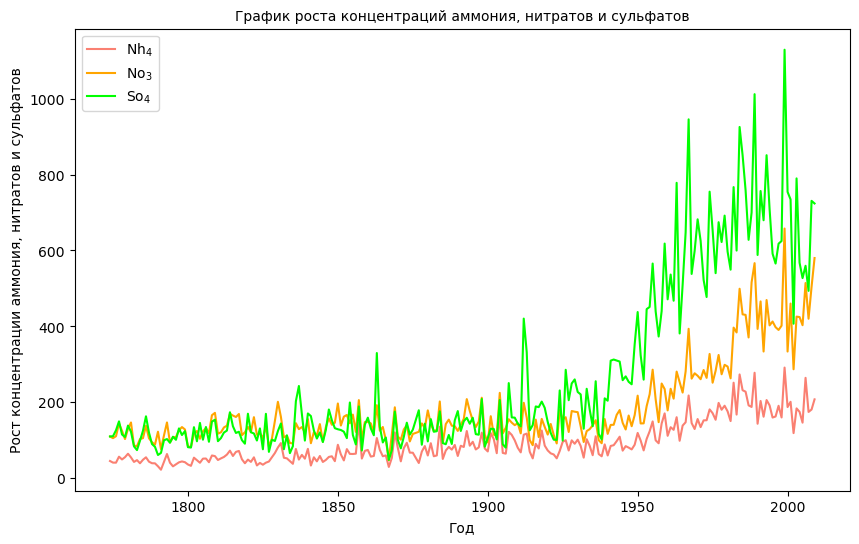

In [21]:
year, nh4, no3, so4 = np.loadtxt('Elbrus_annual_summer.txt', unpack=True, encoding='utf8')
plt.figure(figsize = (10,6))
plt.plot(year, nh4, color='salmon') #increase in ammonium concentration
plt.plot(year, no3, color='orange') #increase in nitrates concentration
plt.plot(year, so4, color='lime') #increase in sulfates concentration

plt.xlabel('Год', fontsize=10)
plt.ylabel('Рост концентрации аммония, нитратов и сульфатов', fontsize=10)
plt.title('График роста концентраций аммония, нитратов и сульфатов', fontsize=10)
plt.legend(['Nh$_4$', 'Nо$_3$', 'So$_4$'], fontsize=10)
plt.show()

In [ ]:
#In what period of time did the active growth of concentration begin?
#This period began in the late 1940s due to the massive industrialization of the world and an increase in population

# Оценивание

- 10 баллов: техническая сложность
- 10 баллов: оформление текста и картинок